In [1]:
import numpy as np
import matplotlib.pyplot as plt

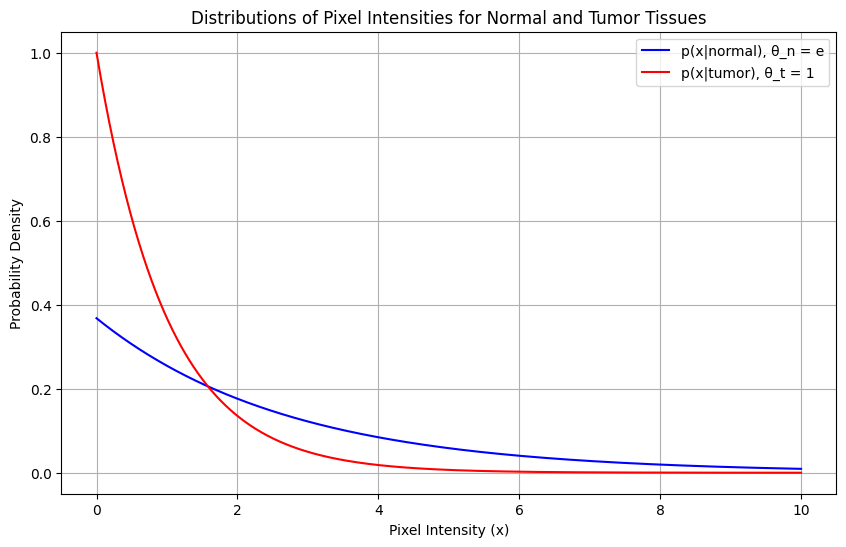

In [2]:
# Parameters for the exponential distributions
theta_n = np.exp(1)  # ~2.718 (normal tissue)
theta_t = 1          # tumor tissue

# Generate x values (pixel intensities)
x = np.linspace(0, 10, 1000)

# Calculate the probability density functions
p_normal = (1 / theta_n) * np.exp(-x / theta_n)
p_tumor = (1 / theta_t) * np.exp(-x / theta_t)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, p_normal, label="p(x|normal), θ_n = e", color='blue')
plt.plot(x, p_tumor, label="p(x|tumor), θ_t = 1", color='red')
plt.title("Distributions of Pixel Intensities for Normal and Tumor Tissues")
plt.xlabel("Pixel Intensity (x)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

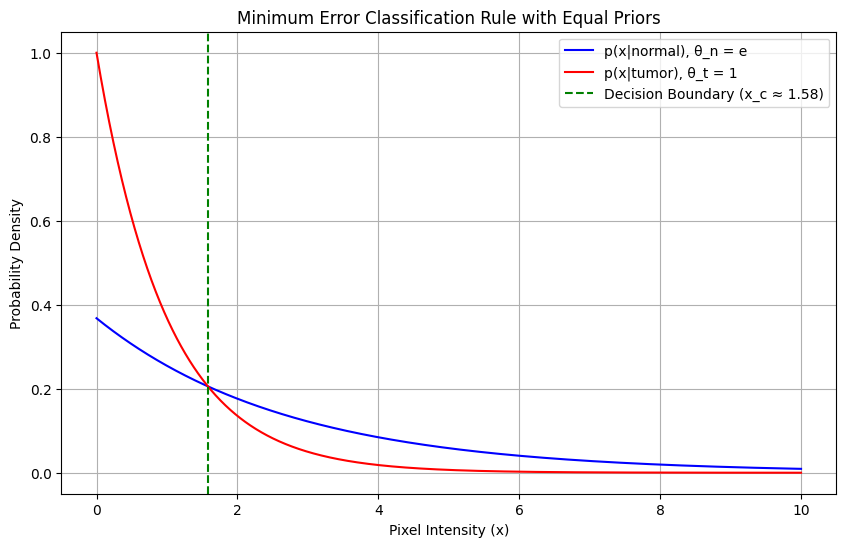

np.float64(1.5819767068693265)

In [3]:
# Calculate the decision boundary x_c
# This is where the two distributions intersect, i.e., p(x|normal) = p(x|tumor)

# Solve the equation analytically for x_c
x_c = (theta_t * theta_n) / (theta_n - theta_t) * np.log(theta_n / theta_t)

# Plot the decision regions along with the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, p_normal, label="p(x|normal), θ_n = e", color='blue')
plt.plot(x, p_tumor, label="p(x|tumor), θ_t = 1", color='red')
plt.axvline(x_c, color='green', linestyle='--', label=f"Decision Boundary (x_c ≈ {x_c:.2f})")
plt.title("Minimum Error Classification Rule with Equal Priors")
plt.xlabel("Pixel Intensity (x)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

x_c


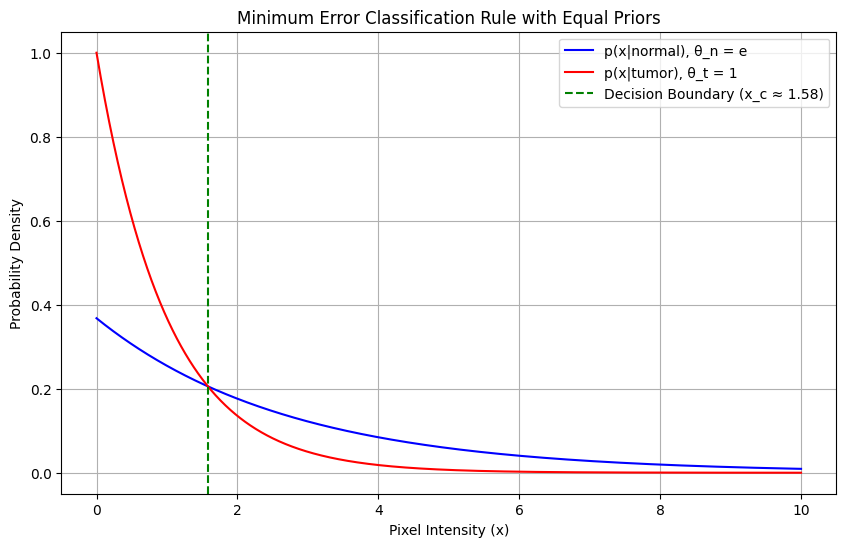

np.float64(1.5819767068693265)

In [4]:
# Calculate the decision boundary x_c
# This is where the two distributions intersect, i.e., p(x|normal) = p(x|tumor)

# Solve the equation analytically for x_c
x_c = (theta_t * theta_n) / (theta_n - theta_t) * np.log(theta_n / theta_t)

# Plot the decision regions along with the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, p_normal, label="p(x|normal), θ_n = e", color='blue')
plt.plot(x, p_tumor, label="p(x|tumor), θ_t = 1", color='red')
plt.axvline(x_c, color='green', linestyle='--', label=f"Decision Boundary (x_c ≈ {x_c:.2f})")
plt.title("Minimum Error Classification Rule with Equal Priors")
plt.xlabel("Pixel Intensity (x)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

x_c

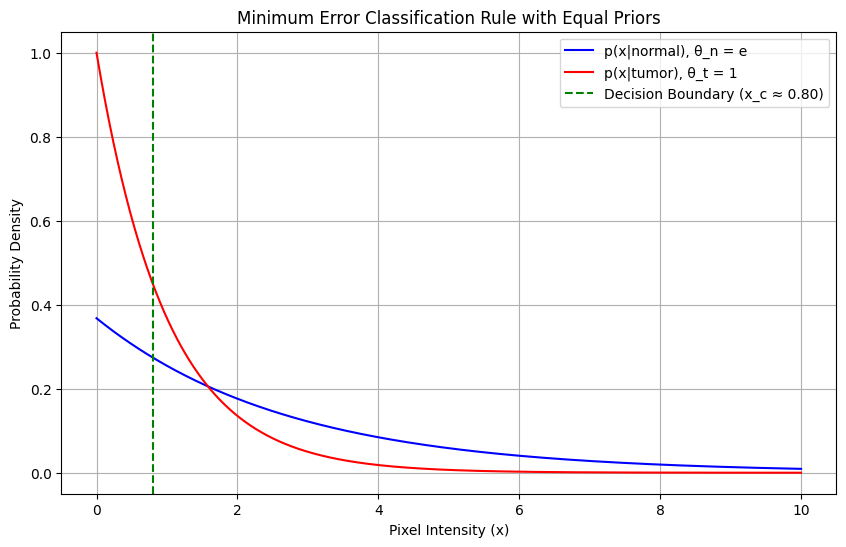

0.8

In [5]:
# Calculate the decision boundary x_c
# This is where the two distributions intersect, i.e., p(x|normal) = p(x|tumor)

# Solve the equation analytically for x_c
x_c = 0.8 # Worked out equation on paper

# Plot the decision regions along with the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, p_normal, label="p(x|normal), θ_n = e", color='blue')
plt.plot(x, p_tumor, label="p(x|tumor), θ_t = 1", color='red')
plt.axvline(x_c, color='green', linestyle='--', label=f"Decision Boundary (x_c ≈ {x_c:.2f})")
plt.title("Minimum Error Classification Rule with Equal Priors")
plt.xlabel("Pixel Intensity (x)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

x_c

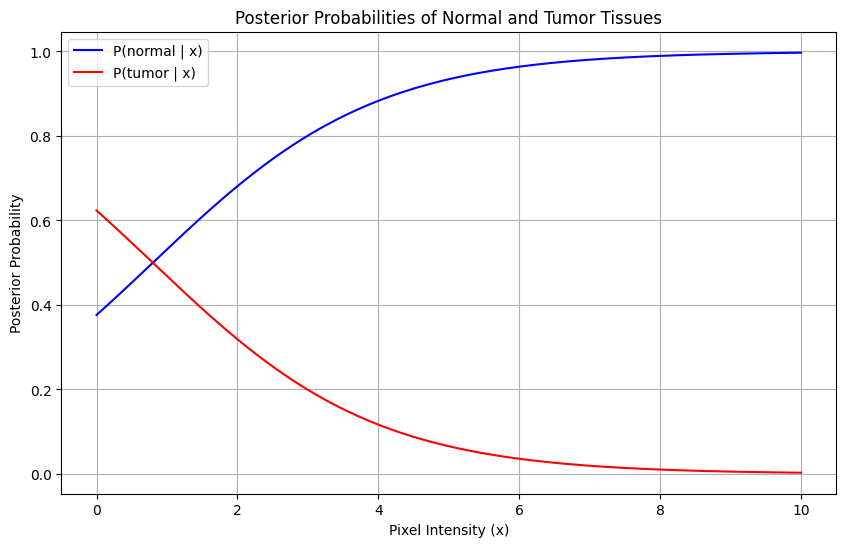

In [6]:
# Parameters for the exponential distributions
theta_n = np.exp(1)  # ~2.718 (normal tissue)
theta_t = 1          # tumor tissue

# Generate x values (pixel intensities)
x = np.linspace(0, 10, 1000)

# Calculate the probability density functions
p_normal = (1 / theta_n) * np.exp(-x / theta_n)
p_tumor = (1 / theta_t) * np.exp(-x / theta_t)

# Define the priors based on given information
P_tumor = 1 / (1 + 1.64)
P_normal = 1.64 / (1 + 1.64)

# Part (d): Calculate posterior probabilities using Bayes' theorem
posterior_normal = (P_normal * p_normal) / (P_normal * p_normal + P_tumor * p_tumor)
posterior_tumor = (P_tumor * p_tumor) / (P_normal * p_normal + P_tumor * p_tumor)

# Plotting the posterior probabilities
plt.figure(figsize=(10, 6))
plt.plot(x, posterior_normal, label="P(normal | x)", color='blue')
plt.plot(x, posterior_tumor, label="P(tumor | x)", color='red')
plt.title("Posterior Probabilities of Normal and Tumor Tissues")
plt.xlabel("Pixel Intensity (x)")
plt.ylabel("Posterior Probability")
plt.legend()
plt.grid(True)
plt.show()

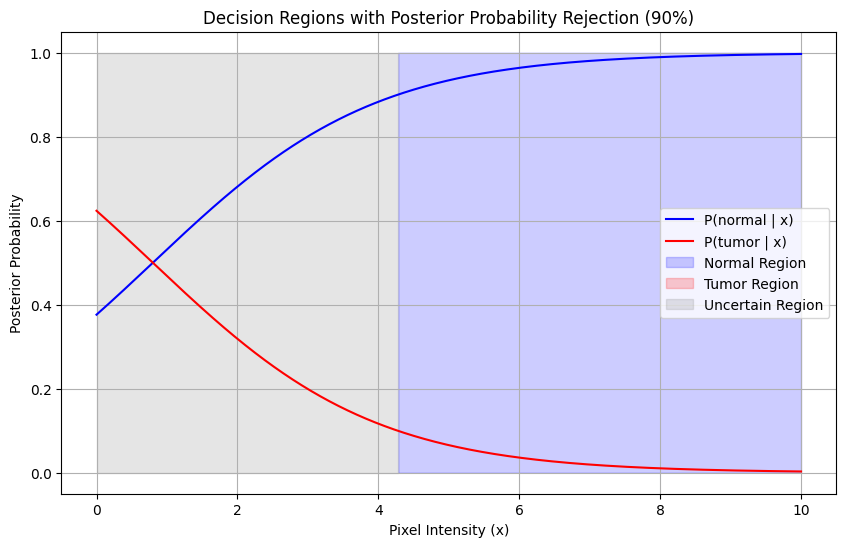

In [7]:
# Part (e): Decision regions based on posterior probability threshold of 0.9
decision_normal = posterior_normal >= 0.9
decision_tumor = posterior_tumor >= 0.9
decision_uncertain = ~(decision_normal | decision_tumor)  # If neither condition is satisfied, it is uncertain

# Plotting the posterior probabilities and decision regions
plt.figure(figsize=(10, 6))
plt.plot(x, posterior_normal, label="P(normal | x)", color='blue')
plt.plot(x, posterior_tumor, label="P(tumor | x)", color='red')
plt.fill_between(x, 0, 1, where=decision_normal, color='blue', alpha=0.2, label="Normal Region")
plt.fill_between(x, 0, 1, where=decision_tumor, color='red', alpha=0.2, label="Tumor Region")
plt.fill_between(x, 0, 1, where=decision_uncertain, color='gray', alpha=0.2, label="Uncertain Region")
plt.title("Decision Regions with Posterior Probability Rejection (90%)")
plt.xlabel("Pixel Intensity (x)")
plt.ylabel("Posterior Probability")
plt.legend()
plt.grid(True)
plt.show()

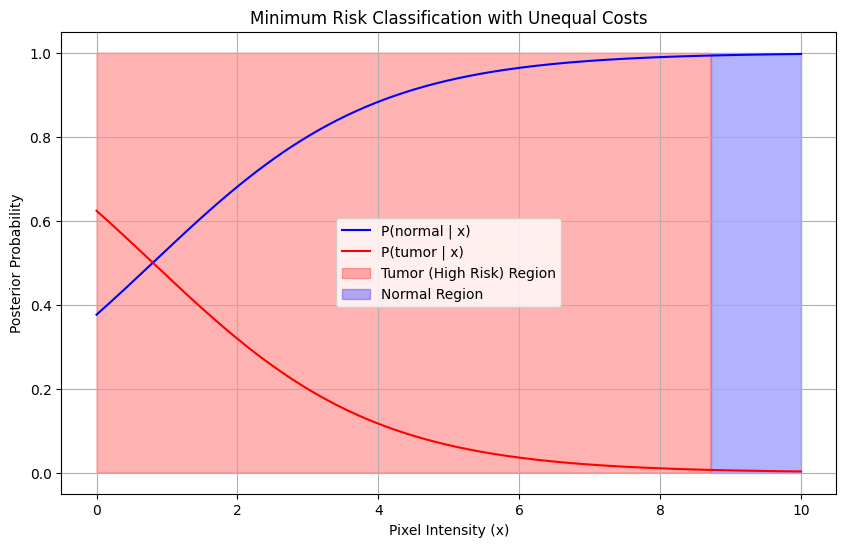

In [8]:
# Part (f): Minimum risk classification with unequal costs
cost_ratio = 148.41  # The cost ratio given
risk_decision_tumor = cost_ratio * posterior_tumor > posterior_normal

# Plotting the posterior probabilities and risk-based decision regions
plt.figure(figsize=(10, 6))
plt.plot(x, posterior_normal, label="P(normal | x)", color='blue')
plt.plot(x, posterior_tumor, label="P(tumor | x)", color='red')
plt.fill_between(x, 0, 1, where=risk_decision_tumor, color='red', alpha=0.3, label="Tumor (High Risk) Region")
plt.fill_between(x, 0, 1, where=~risk_decision_tumor, color='blue', alpha=0.3, label="Normal Region")
plt.title("Minimum Risk Classification with Unequal Costs")
plt.xlabel("Pixel Intensity (x)")
plt.ylabel("Posterior Probability")
plt.legend()
plt.grid(True)
plt.show()